# Kaggle Heart Disease Project

This data contains information about patient attributes and heart disease. The data set is from https://www.kaggle.com/ronitf/heart-disease-uci

## Exploratory Data Analysis

Here we explore our data set. What does it look like? Are there missing values or outliers? What features might be related to our target?

Let's import the libraries we will need and load in our dataset.

In [30]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#load the data
df = pd.read_csv('heartdata.csv')

#what is my data structured like?
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


We have 14 columns. What do each of these column titles mean?
1. Age in years 
2. Sex (1 = male, 0 = female)
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholesterol in mg/dl
6. fasting blood sugar > 120 mg/dl (1=true, 0=false)
7. resting electrocardiographic results (values 0,1,2)
8. thalach = maximum heart rate achieved
9. exercise induced angina (0 = no, 1 = yes)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. ca = number of major vessels (0-3) colored by fluorosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect (results of blood flow observed)
14. target (1 = NO heart disease, 0= yes heart disease)


In [2]:
#how many rows and columns?
df.shape

(303, 14)

In [3]:
#how is my data distributed?
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#Do we have any null values?
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

We don't have any null values. 

Let's see if we have any outliers. 

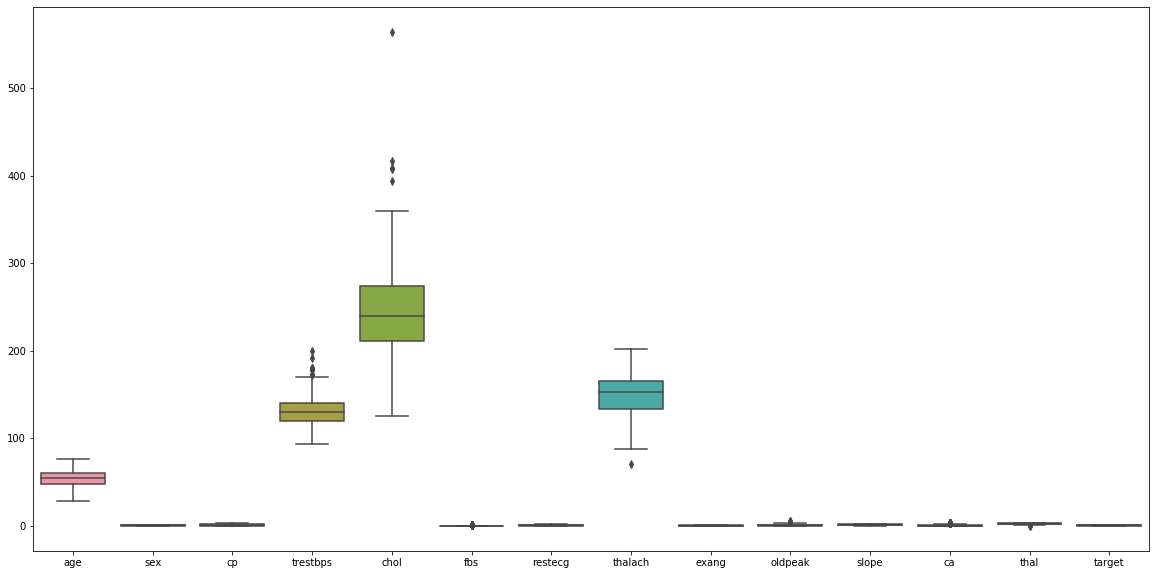

In [5]:
#identify outliers
plt.subplots(figsize=(20,10))
sns.boxplot(data = df)

Cholesterol (feature 5) looks like it has an extreme outlier over 500. Let's remove this sample from our data set. 

In [6]:
#find the entry with cholesterol over 500
df.loc[df['chol'] > 500]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [7]:
#remove the entry with outlier
df.drop(df.index[85],inplace=True)
#check to make sure we have 302 rows now 
df.shape

(302, 14)

Let's see if we have a balanced number of men and women in the data set. 

In [8]:
df['sex'].value_counts()

1    207
0     95
Name: sex, dtype: int64

<BarContainer object of 2 artists>

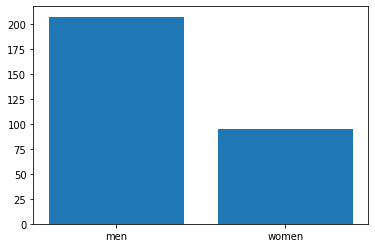

In [9]:
#plot the amount of men and women
df['sex'].value_counts()
x = ['men', 'women']
y= [207, 95]
plt.bar(x,y)

We seem to have about twice as many men in the dataset. 

How many cases of heart disease do we have in our dataset?

In [10]:
#1 means NO heart disease, 0 means they do have heart disease
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

<BarContainer object of 2 artists>

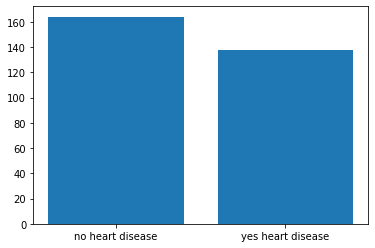

In [11]:
#plot the amount of patients with and without heart disease
df['target'].value_counts()
X = ['no heart disease', 'yes heart disease']
Y= [164, 138]
plt.bar(X,Y)

The target seems fairly balanced.

Let's explore some correlations between features.

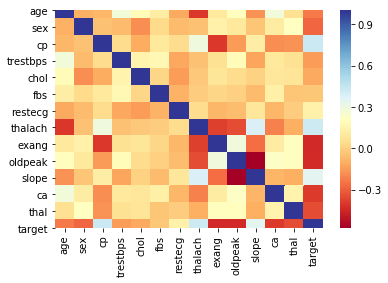

In [12]:
#computer the correlation matrix
correlations = df.corr()

#seaborn correlation heat map
sns.heatmap(correlations,cmap=plt.cm.RdYlBu)

It looks like some features have stronger correlations.

cp (chest pain type), thalach (max heart rate achieved), and slope seem to have some positive correlation with the target. Remember that 1 means NO heart disease. So perhaps these features are associated with being healthier or less likely to have heart disease.

exang (exercise angina), oldpeak, ca (number of major blood vessels), thal (results of bloodflow observed), sex, and age seem to have some negative correlation with the target. These features might be associated with higher likelihood that you have heart disease. 

Some of these features are categorical and some are numerical, so that is also important to keep in mind. 

Let's plot these features one at a time to further examine them. 



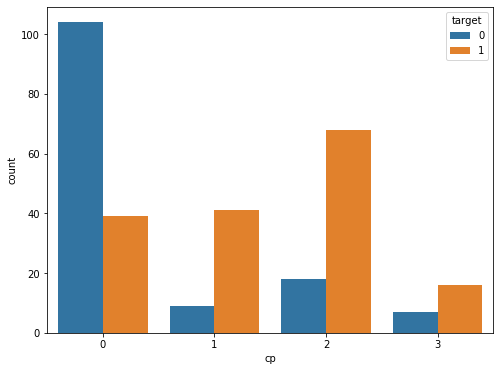

In [13]:
#cp and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.show()

The chest pain has the following categories:
Value 0: asymptomatic, 
Value 1: atypical angina, 
Value 2: pain without relation to angina, 
Value 3: typical angina, 

It looks like many people with heart disease are asymptomatic. 

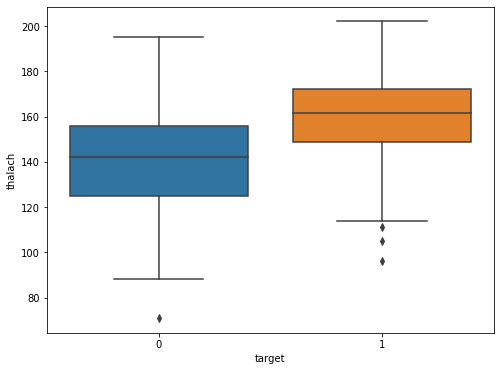

In [14]:
#thalach and target
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=df)
plt.show()


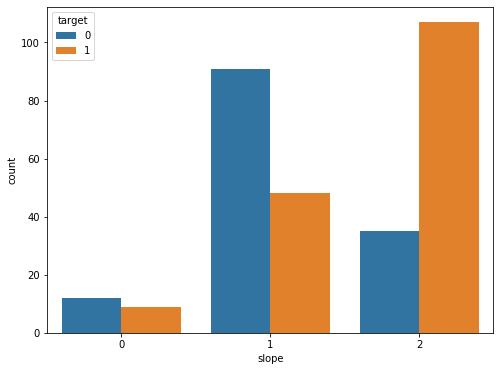

In [15]:
#slope and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="slope", hue="target", data=df)
plt.show()

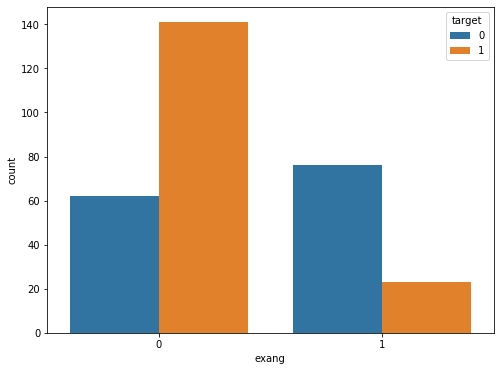

In [16]:
#exang and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="exang", hue="target", data=df)
plt.show()

For exercise induced angina, 0 = no, 1 = yes. Many healthy people did not have exercise induced angina. 

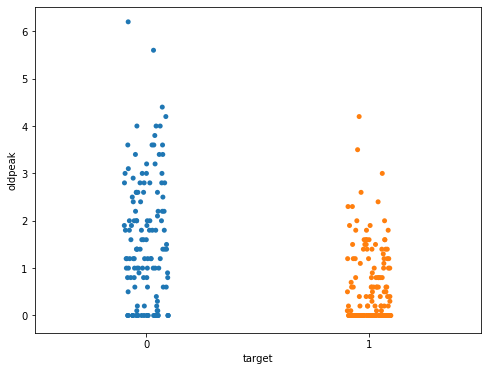

In [17]:
#oldpeak and target
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="oldpeak", data=df)
plt.show()

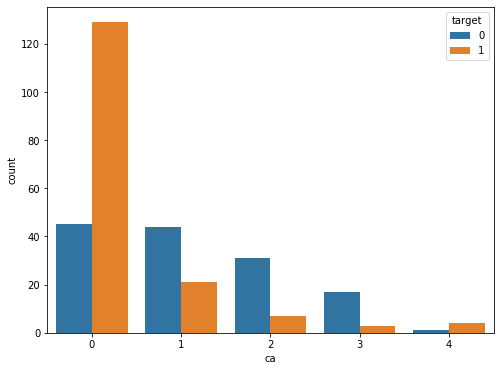

In [18]:
#ca and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="ca", hue="target", data=df)
plt.show()

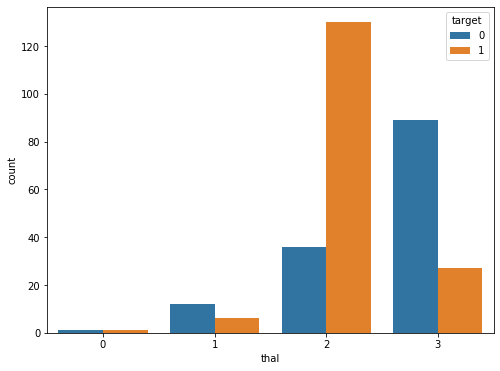

In [19]:
#thal and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="thal", hue="target", data=df)
plt.show()

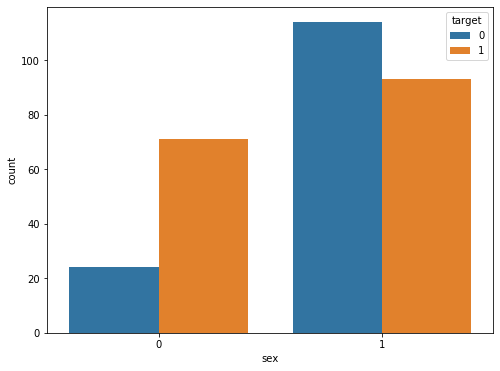

In [20]:
#sex and target
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

(1 = male, 0 = female)

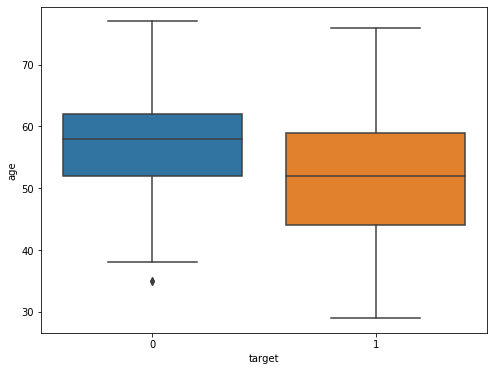

In [21]:
#age and target
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.show()

It looks like people with no heart disease tend to be a bit younger.

## Modeling and Predicting

Let's take what we've learned from our Exploratory Data Analysis and see if we can use those features to help us make a model that can predict who has heart disease.

Many of these columns represent categorical data, so let's change them to represent that using one-hot encoding.

In [26]:
#one hot encoding for cp, slope, exang, ca, thal, sex
dataset = pd.get_dummies(df, columns = ['cp', 'slope', 'exang', 'ca', 'thal', 'sex'])
dataset.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,target,cp_0,cp_1,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,sex_0,sex_1
0,63,145,233,1,0,150,2.3,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,37,130,250,0,1,187,3.5,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,41,130,204,0,0,172,1.4,1,0,1,...,0,0,0,0,0,0,1,0,1,0
3,56,120,236,0,1,178,0.8,1,0,1,...,0,0,0,0,0,0,1,0,0,1
4,57,120,354,0,1,163,0.6,1,1,0,...,0,0,0,0,0,0,1,0,1,0


Now let's get rid of the 4 columns that seemed to have little correlation to our target: trestbps, chol, restecg, fbs.

In [29]:
#using the drop function to eliminate those columns
subset = dataset.drop(['trestbps', 'chol', 'fbs', 'restecg'], axis = 1)
subset.head()

,age,thalach,oldpeak,target,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,sex_0,sex_1
0,63,150,2.3,1,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,1
1,37,187,3.5,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,41,172,1.4,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,56,178,0.8,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,57,163,0.6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


Now let's normalize the values to get them to a value between 0 and 1. 

In [31]:
#scaling the data
data_scaled=MinMaxScaler().fit_transform(subset)
data_scaled=pd.DataFrame(data=data_scaled, columns=subset.columns)
data_scaled.head()

,age,thalach,oldpeak,target,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,...,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,sex_0,sex_1
0,0.708333,0.603053,0.370968,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.166667,0.885496,0.564516,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.250000,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.562500,0.816794,0.129032,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.583333,0.702290,0.096774,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Now let's split our data into a train and test set. Our dataset is somewhat small, so let's not use a cross-validation set. 

In [33]:
#making a new df for labels and feature for test train split
X = data_scaled.drop(columns=['target'])
y = data_scaled['target']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.33, random_state = 42)

In [35]:
#check the shape of our sets to make sure they split correctly
X_train.shape


(202, 23)

In [36]:
X_test.shape

(100, 23)

In [37]:
y_train.shape

(202,)

In [38]:
y_test.shape

(100,)

Now let's build and train our model. We will use a logistic regression model. 

In [39]:
#initialize a model
my_model = LogisticRegression(random_state=35)

#feed in the training data
my_model.fit(X_train, y_train)

/Users/Christine/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=35, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
#predict using the model
y_pred = my_model.predict(X_test)

In [41]:
#looking at our predictions-what our model thinks the answers are
y_pred

array([0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [42]:
#looking at the actual targets-what the real answers are
y_test.to_numpy()

array([0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.])

How did our model do? Let's evaluate it. 

In [43]:
#evaluate the accuracy, the percent we got correct 
my_model.score(X_test, y_test)

0.88

Our model had 88% accuracy! Not bad, but maybe it could be improved. 

## Conclusion and Next Steps

It seems that our exploratory data analysis yielded some good insight. The 9 features we chose appeared to be helpful in predicting whether a patient had heart disease. 

How could we make our model more accurate? We could try different feature engineering techniques or different combination of features. We could also try using a different model, like K-nearest neighbors or Random Forest. 

Perhaps finding another similar dataset, but with more balance between men and women would also be beneficial (or possibly even separating data by sex). Another noticing is that cholesterol was left out of the model because it didn't show up as having a strong correlation to the target. This seems odd since it is common knowledge that high cholesterol is a risk for heart disease. Normal cholesterol levels in healthy adults are under 200, but in our dataset, the majority of our patients had cholesterol over 200. A dataset that shows a better balance of healthier cholesterol levels might also increase model accuracy. 